In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd


In [ ]:
p = np.linspace(1e-6, 1 - 1e-6, 500)
gini = 2 * p * (1 - p)
entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

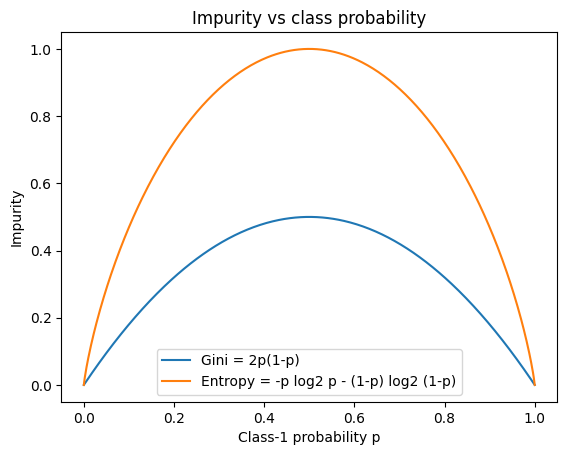

In [ ]:

plt.figure()
plt.plot(p, gini, label="Gini = 2p(1-p)")
plt.plot(p, entropy, label="Entropy = -p log2 p - (1-p) log2 (1-p)")
plt.xlabel("Class-1 probability p")
plt.ylabel("Impurity")
plt.title("Impurity vs class probability")
plt.legend()
plt.show()

In [ ]:

X, y = make_moons(n_samples=400, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:


tree_gini = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
tree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
tree_gini.fit(X_train, y_train)
tree_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:

y_pred_gini = tree_gini.predict(X_test)
y_pred_entropy = tree_entropy.predict(X_test)
print("Test accuracy (Gini):   ", accuracy_score(y_test, y_pred_gini))
print("Test accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))

Test accuracy (Gini):    0.9166666666666666
Test accuracy (Entropy): 0.9166666666666666


In [ ]:
def plot_decision_regions(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300),
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.show()


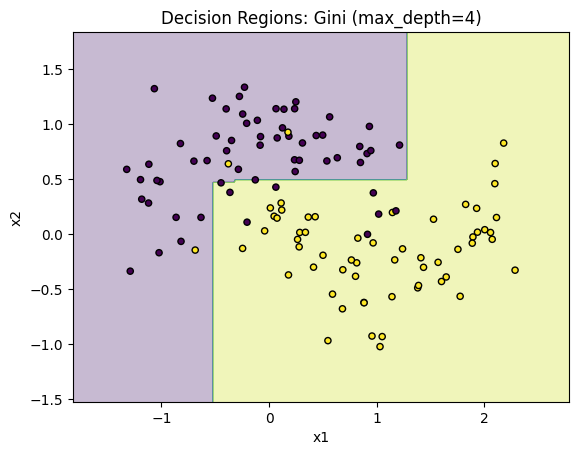

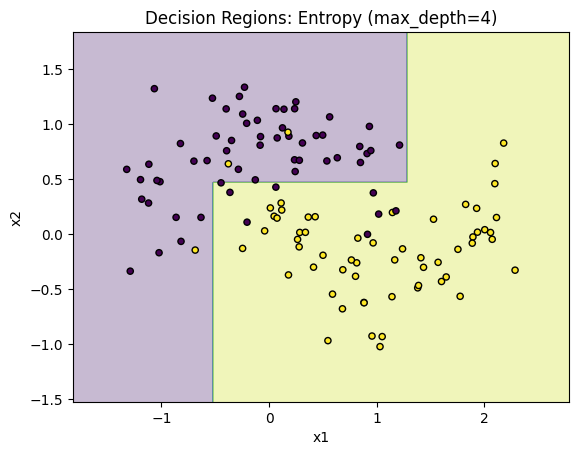

In [ ]:
plot_decision_regions(tree_gini, X_test, y_test, "Decision Regions: Gini (max_depth=4)")
plot_decision_regions(tree_entropy, X_test, y_test, "Decision Regions: Entropy (max_depth=4)")

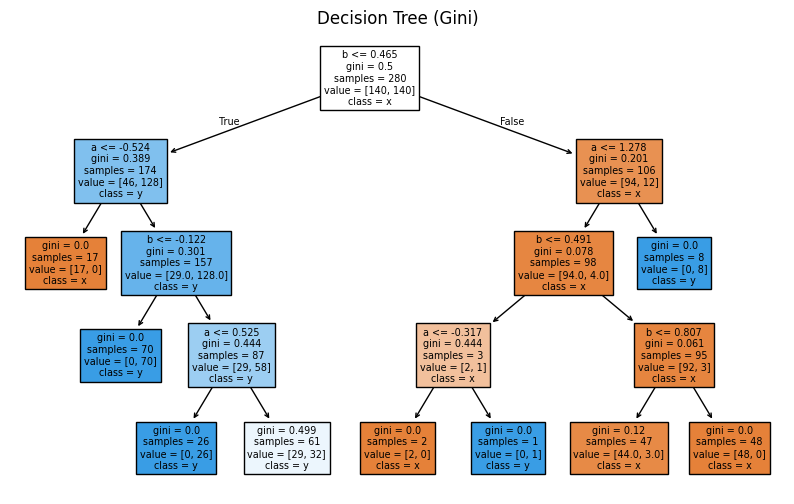

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(tree_gini, filled=True, feature_names=["a", "b"], class_names=["x", "y"])
plt.title("Decision Tree (Gini)")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
clf = DecisionTreeClassifier(
    criterion="gini",   # use "entropy" to switch
    max_depth=2,
    random_state=42
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))
print("Feature importances:", clf.feature_importances_)

Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

Feature importances: [0. 0. 1. 0.]


In [ ]:

feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X_train

array([[7.4, 2.8, 6.1, 1.9],
       [7.7, 2.8, 6.7, 2. ],
       [5.5, 2.4, 3.7, 1. ],
       [6.1, 2.8, 4. , 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.3, 3.3, 6. , 2.5],
       [4.6, 3.4, 1.4, 0.3],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.1, 1.6, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [5.1, 3.8, 1.9, 0.4],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 2. , 3.5, 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 3.9, 1.2],
       [7.2, 3. , 5.8, 1.6],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 4.4, 1.5, 0.4],
       [5.2, 2.7, 3.9, 1.4],
       [7. , 3.2, 4.7, 1.4],
       [6.9, 3.1, 4.9, 1.5],
       [5.3, 3.7, 1.5, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3. , 5.2, 2.3],
       [4.9, 3. , 1.4, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [6.3, 2.3, 4.4, 1.3],
       [6.9, 3.2, 5.7, 2.3],
       [5. , 3.6, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [6.7, 3.1, 4.7, 1.5],
       [4.9, 3.1, 1.5, 0.1],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 3

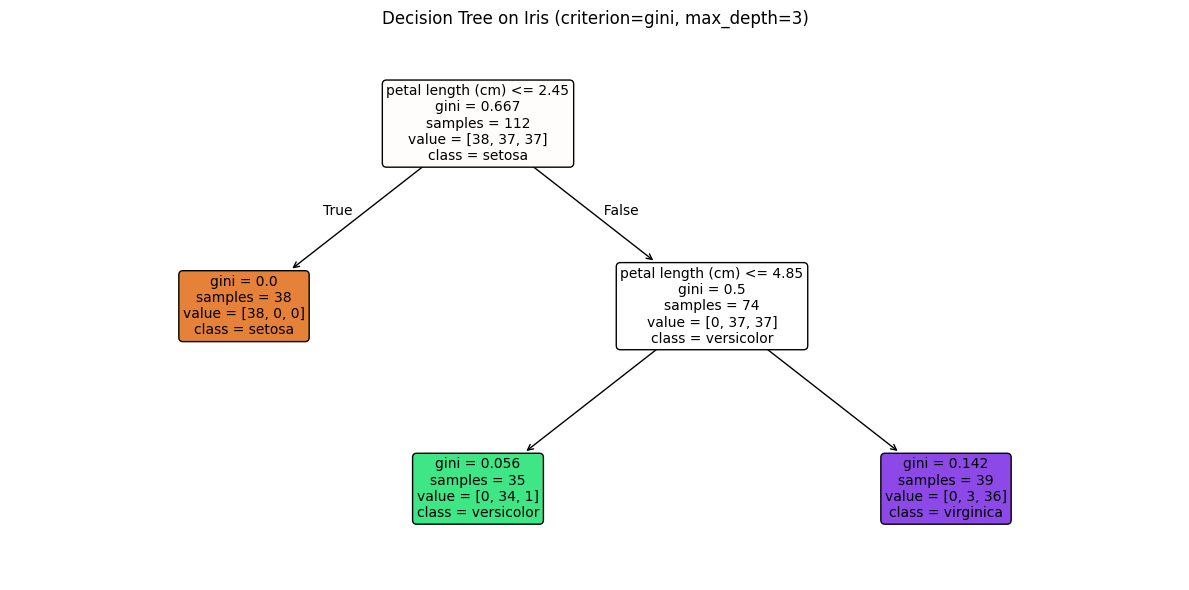

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree on Iris (criterion=gini, max_depth=3)")
plt.tight_layout()
plt.show()

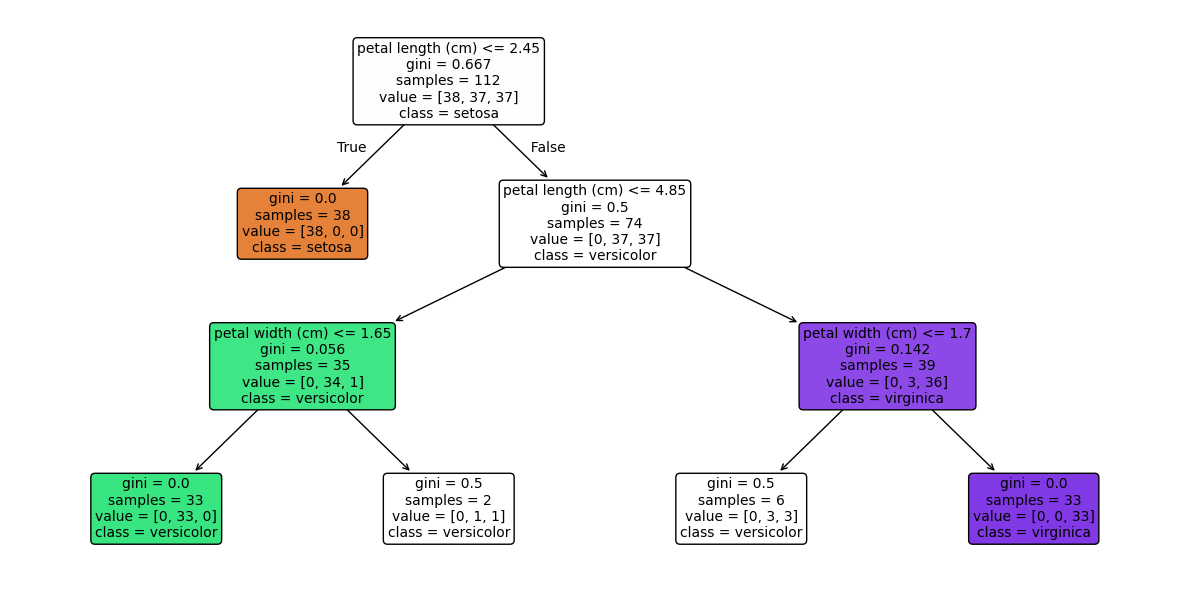

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()